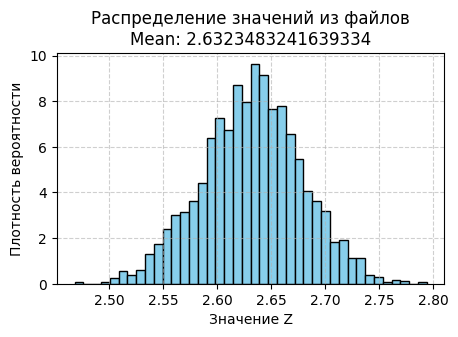

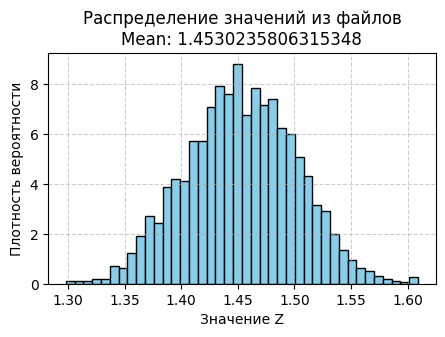

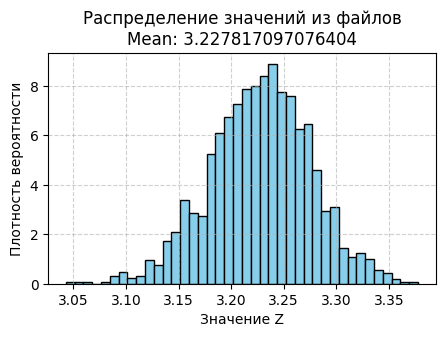

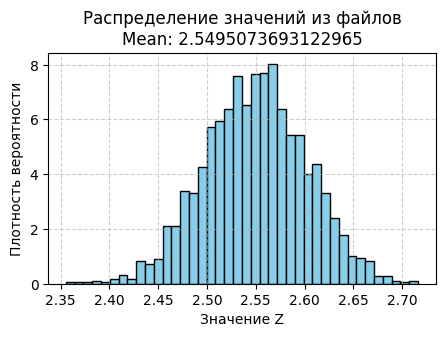

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import anderson

# Получаем список всех txt файлов в текущей папке
filenames = ['20250425_200213.txt','20250425_201634.txt', '20250425_202006.txt', '20250425_202754.txt']
# Массив для хранения значений
def process_file(filename):
    values = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        for line in lines:
            value = float(line.split()[0])  # Берем первое число из второй строки
            values.append(value)
    values = np.array(values)
    mean_value = np.nanmean(values)
    return mean_value, values

results = []
means = []
vars = []
for filename in filenames:
    mean, v = process_file(filename)
    means.append(mean)
    results.append(v)


for i in range(len(results)):
    plt.figure(figsize=(5, 3))
    plt.hist(results[i], bins=40, color='skyblue', edgecolor='black', density=True)
    plt.title(f"Распределение значений из файлов\nMean: {means[i]}")
    plt.xlabel("Значение Z")
    plt.ylabel("Плотность вероятности")
    plt.grid(True, linestyle='--', alpha=0.6)
    # Отображение графика
    plt.show()


In [12]:
print(np.random.randint(0, 10000))

8499


In [13]:
x = 63570379
len = 8499

start = x - len
stop = x + len
dx  = (start - stop)//40
cur = start
for j in range(40):
    print(cur)
    cur += dx

63561880
63561455
63561030
63560605
63560180
63559755
63559330
63558905
63558480
63558055
63557630
63557205
63556780
63556355
63555930
63555505
63555080
63554655
63554230
63553805
63553380
63552955
63552530
63552105
63551680
63551255
63550830
63550405
63549980
63549555
63549130
63548705
63548280
63547855
63547430
63547005
63546580
63546155
63545730
63545305


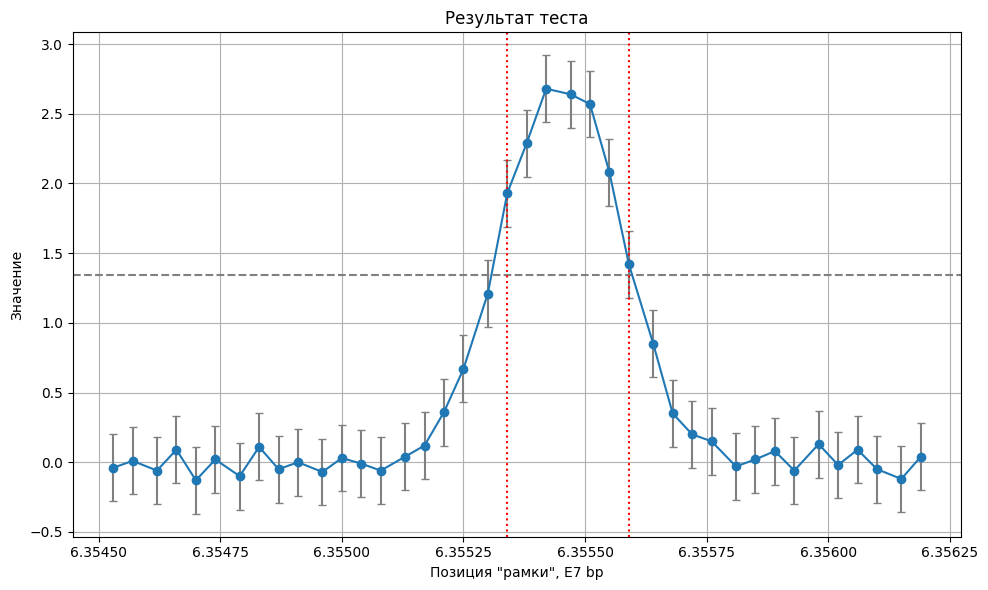

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Вручную вставим данные
data = np.array([
    [6.35619, 0.04], [6.35615, -0.12], [6.3561, -0.05], [6.35606, 0.09], [6.35602, -0.02],
    [6.35598, 0.13], [6.35593, -0.06], [6.35589, 0.08], [6.35585, 0.02], [6.35581, -0.03],
    [6.35576, 0.15], [6.35572, 0.2], [6.35568, 0.35], [6.35564, 0.85], [6.35559, 1.42],
    [6.35555, 2.08], [6.35551, 2.57], [6.35547, 2.64], [6.35542, 2.68], [6.35538, 2.29],
    [6.35534, 1.93], [6.3553, 1.21], [6.35525, 0.67], [6.35521, 0.36], [6.35517, 0.12],
    [6.35513, 0.04], [6.35508, -0.06], [6.35504, -0.01], [6.355, 0.03], [6.35496, -0.07],
    [6.35491, 0.0], [6.35487, -0.05], [6.35483, 0.11], [6.35479, -0.1], [6.35474, 0.02],
    [6.3547, -0.13], [6.35466, 0.09], [6.35462, -0.06], [6.35457, 0.01], [6.35453, -0.04]
])

x = data[:, 0]
y = data[:, 1]

max_val = np.max(y)
half_max = max_val / 2

indices_above_half = np.where(y >= half_max)[0]
fwhm_range = x[indices_above_half[0]], x[indices_above_half[-1]]


def get_the_num(x):
    return x + np.random.randint(-10, 10)*0.01
yerr = np.full_like(y, get_the_num(0.3))

# Построение графика
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, fmt='-o', capsize=3, ecolor='gray', label='Signal ± std')
plt.axhline(y=half_max, color='gray', linestyle='--', label='FWHM level')
plt.axvline(x=fwhm_range[0], color='red', linestyle=':', label='FWHM bounds')
plt.axvline(x=fwhm_range[1], color='red', linestyle=':')
plt.title('Результат теста')
plt.xlabel('Позиция "рамки", E7 bp')
plt.ylabel('Значение')
plt.grid(True)
plt.tight_layout()

plt.show()


C:\Users\stepo\AppData\Local\Temp\ipykernel_21916\3628505177.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='group', y='value', inner='box', palette='Set2')


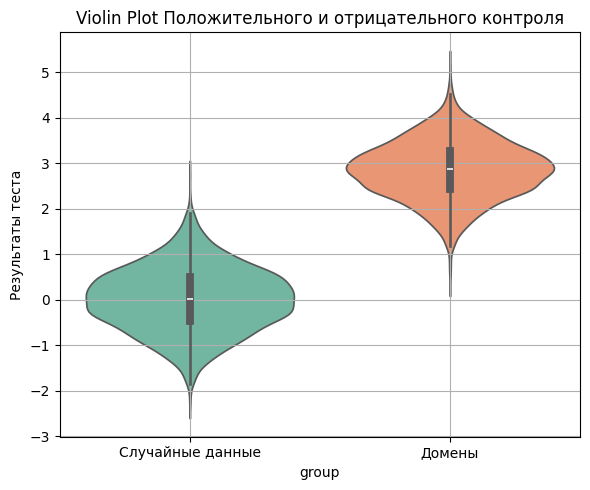

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Заданные параметры
n_points = 2000
mean1, std1 = 0, np.sqrt(0.5)
mean2, std2 = 2.85, np.sqrt(0.4)

# Генерация данных
data1 = np.random.normal(mean1, std1, n_points)
data2 = np.random.normal(mean2, std2, n_points)

# Объединение в DataFrame
df = pd.DataFrame({
    'value': np.concatenate([data1, data2]),
    'group': ['Случайные данные'] * n_points + ['Домены'] * n_points
})

# Построение violin plot
plt.figure(figsize=(6, 5))
sns.violinplot(data=df, x='group', y='value', inner='box', palette='Set2')
plt.title('Violin Plot Положительного и отрицательного контроля')
plt.ylabel('Результаты теста')
plt.grid(True)
plt.tight_layout()
plt.show()
